### Sheth l.u.j & sir mv college science , commerce and arts

Aman Dubal T076

Aim : K-Means Clustering.

1. Apply the K-Means algorithm to group similar data points into clusters.
2. Determine the optimal number of clusters using elbow method or silhouette
analysis.
3. Visualize the clustering results and analyze the cluster characteristics.

0. Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

 1. Load your dataset

In [ ]:
df = pd.read_csv('crop-yield.csv')
df

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80,21,64,7.22,34.04,Loamy,0.85,35.20,78.31,850.20,10.26,2.20,East,1630,Rabi,Wheat,Rainfed,191.11,12.02,8.87
9996,168,36,36,6.45,56.84,Loamy,0.66,37.19,38.78,2490.54,7.87,7.06,East,1665,Zaid,Sugarcane,Canal,238.87,21.86,77.29
9997,100,99,24,7.18,18.13,Sandy,0.54,11.36,56.64,1965.34,10.06,12.42,Central,591,Zaid,Sugarcane,Drip,312.73,18.79,73.57
9998,68,20,63,6.32,53.47,Loamy,0.68,35.95,57.94,497.37,10.18,6.28,North,1900,Kharif,Sugarcane,Rainfed,227.50,10.58,74.22


2. Preprocessing

 K-Means works best with numeric data



In [ ]:
le = LabelEncoder()
categorical_cols = ['Soil_Type', 'Region', 'Season', 'Crop_Type', 'Irrigation_Type']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

3. Feature Selection

 Selecting numerical and encoded features for clustering

In [ ]:
features = df.drop(columns=['Crop_Yield_ton_per_hectare'])

4. Scaling

 Scaling is crucial for distance-based algorithms like K-Means

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

5. Determining optimal clusters (The Elbow Method)

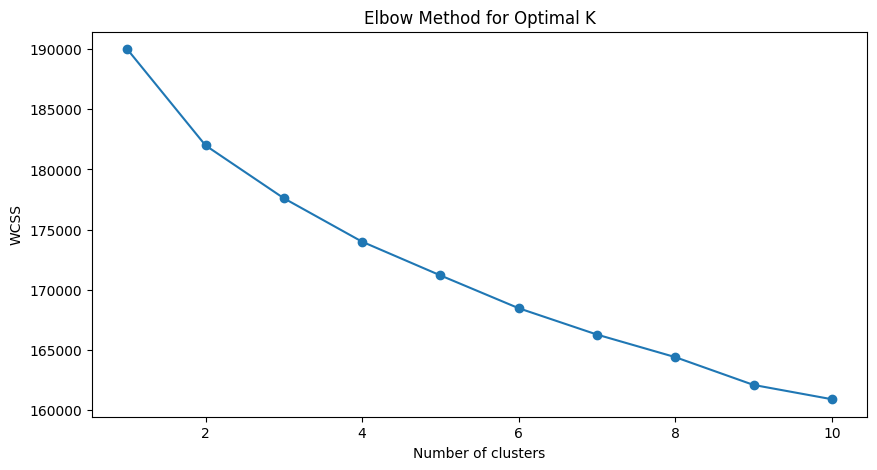

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

6. Training the Model

 Assuming 3 clusters based on the elbow method or your requirement


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

7. Reviewing Results


In [ ]:
print(df.groupby('Cluster').mean())

                  N          P          K   Soil_pH  Soil_Moisture  Soil_Type  \
Cluster                                                                         
0        105.355470  56.769971  84.457170  6.521347      39.692368   1.473211   
1        105.536669  57.882536  85.530764  6.457486      39.610696   1.456495   
2        104.180082  55.901228  85.019372  6.530922      40.831965   1.565621   

         Organic_Carbon  Temperature   Humidity     Rainfall  Sunlight_Hours  \
Cluster                                                                        
0              0.962361    24.889118  59.842429  1611.344495        7.510504   
1              0.964354    24.616249  59.591168  1580.567166        7.511933   
2              0.949683    25.697012  60.204327  1461.970789        7.502057   

         Wind_Speed    Region     Altitude    Season  Crop_Type  \
Cluster                                                           
0          9.446038  2.057106  1062.902470  0.997113   2.57